In [1]:


import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ROOT_PATH = '/content/drive/MyDrive/kp_data'

import os
import glob

files = glob.glob(os.path.join(ROOT_PATH, '*'))

files = dict(map(lambda x: (x.split('/')[-1], x), files))

In [22]:
df = pd.read_csv(
    files['All_browse_data_без_погружения_19971021_20211231_с_пропусками.csv'], 
    encoding='cp1251', na_values='N')
print(df.shape)
df.head()

(212328, 63)


,year,month,day,hour from,hour to,doySin,hourSin,doyCos,hourCos,Dst,Lg_Dst,Kp*10,KpH,AE,lg(AE),ULFgr,lg(ULFgr),ULFgeo,lg(ULFgeo),ULFimf,lg(ULFimf),ULFden,lg(ULFden),B_rtn_r,B_rtn_t,B_rtn_n,B_x,B_gse_y,B_gse_z,B_gsm_y,B_gsm_z,B_magn,SW_spd,SW_spd_Clip290,H_den_SWP,lg(H_den_SWP),He_ratio_SWP,lg(He_ratio),Trr_SWP,lg(Trr),p=n*v*v/2,lg(p),Bs,vBs,E=vBmagn,?c=arctan(By/Bz),?2,E_KL,E_KLV,E_WAV,E_TL,dÔ_MP/dt,E>0.8 MeV,"lg(E>0,8 MeV)",E>2 MeV,lg(E>2 MeV),E>2 MeV G16,lg(E>2 MeV) G16,CH_rca (193),CH_rca (211),SW_spd_frcst (193),SW_spd_frcst (211),Unnamed: 62
0,1997,10,21,0,1,-0.505271,0.991445,-0.862961,-0.130526,-14,2.056905,13,13.0,97.0,1.986772,2.97,0.472756,1.03,0.012837,NaN,NaN,NaN,NaN,-0.5200,-2.8146,-0.4584,0.5109,2.7669,-0.6968,2.5359,-1.3079,2.9758,314.1321,314.1321,12.9222,1.111336,0.0048,-2.318759,19301.0,4.285580,637574.7335,5.804531,-1.3079,-410.853374,934.794303,-1.094625,204.009280,253.151859,15965.17718,68.556113,20964.851670,774.055916,NaN,NaN,5.191667,0.715307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,10,21,1,2,-0.505889,0.923880,-0.862598,-0.382683,-15,2.060698,13,13.0,140.0,2.146128,4.33,0.636488,0.86,-0.065502,NaN,NaN,NaN,NaN,-1.2371,-2.4112,-0.7672,1.2293,2.3409,-0.9705,1.9996,-1.5567,2.9847,312.1933,312.1933,12.4466,1.095051,0.0048,-2.318759,20405.0,4.309737,606551.7972,5.782868,-1.5567,-485.991310,931.803342,-0.909300,103.435057,179.699003,11215.83236,34.655093,7361.010199,489.170697,NaN,NaN,2.732364,0.436539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997,10,21,2,3,-0.506508,0.793353,-0.862235,-0.608761,-15,2.060698,13,13.0,92.0,1.963788,4.56,0.658965,0.51,-0.292430,NaN,NaN,NaN,NaN,-1.0137,-3.1460,-0.6153,1.0036,3.0852,-0.8819,2.6601,-1.7945,3.8404,316.9855,316.9855,5.9342,0.773362,0.0131,-1.882729,12445.0,4.094995,298133.6360,5.474411,-1.7945,-568.830480,1217.351114,-0.977322,227.053515,268.277230,14950.83475,59.122361,10060.978240,705.549427,NaN,NaN,3.341625,0.523958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997,10,21,3,4,-0.507126,0.608761,-0.861872,-0.793353,-13,2.053078,7,11.0,79.0,1.897627,4.26,0.629410,0.29,-0.537602,NaN,NaN,NaN,NaN,-1.7296,-3.4436,-0.0115,1.7186,3.4354,-0.3063,3.0987,-1.5146,3.9844,314.1683,314.1683,8.7635,0.942678,0.0121,-1.917215,17707.0,4.248145,432486.2648,5.635972,-1.5146,-475.839307,1251.772175,-1.116160,392.233359,351.037444,20752.46157,98.442264,25675.026680,985.286740,NaN,NaN,2.082444,0.318573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997,10,21,4,5,-0.507744,0.382683,-0.861508,-0.923880,-13,2.053078,7,9.0,82.0,1.913814,4.08,0.610660,0.23,-0.638272,NaN,NaN,NaN,NaN,0.0695,-4.1812,-0.1133,-0.0828,4.1560,-0.4702,3.6106,-2.1111,4.2707,310.7253,310.7253,10.6929,1.029096,0.0067,-2.173925,22869.0,4.359247,516200.8813,5.712819,-2.1111,-655.972181,1327.014539,-1.041706,347.510149,328.603401,19934.28746,81.370770,20473.362200,861.449908,NaN,NaN,0.937637,-0.027965,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.shape)

df.info(null_counts=True)

(212328, 63)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212328 entries, 0 to 212327
Data columns (total 63 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                212328 non-null  int64  
 1   month               212328 non-null  int64  
 2   day                 212328 non-null  int64  
 3   hour from           212328 non-null  int64  
 4   hour to             212328 non-null  int64  
 5   doySin              212328 non-null  float64
 6   hourSin             212328 non-null  float64
 7   doyCos              212328 non-null  float64
 8   hourCos             212328 non-null  float64
 9   Dst                 212328 non-null  int64  
 10  Lg_Dst              212328 non-null  float64
 11  Kp*10               212328 non-null  int64  
 12  KpH                 212328 non-null  float64
 13  AE                  178464 non-null  float64
 14  lg(AE)              178464 non-null  float64
 15  ULFgr               2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import datetime

df['dttm'] = df.apply(
    lambda x: datetime.datetime(x.year, x.month, x.day, x['hour from'], 0), axis=1)

In [ ]:
# 1) Что такое N? - пропуски?
# 2) Референсные значения ошибок
# 3) Корректно ли использовать линейную интерполяцию? (Не заглядываем ли мы в будущее
# 4) Входные переменные почасовые?
# 5) Известны ли входные переменные на дату предсказания?
# 6) Что делать с данными где очень большое количество пропусков?
# 8) В данных св частотный сдвиг в 2005 году. Источник измерений сменился?
# 9) Смысл использовать и GSM и GSE одновременно?

In [ ]:
df_3h = df.sort_values(by='dttm').iloc[::3]

In [ ]:
ts = df_3h.set_index('dttm')['Kp*10'].asfreq('3H')

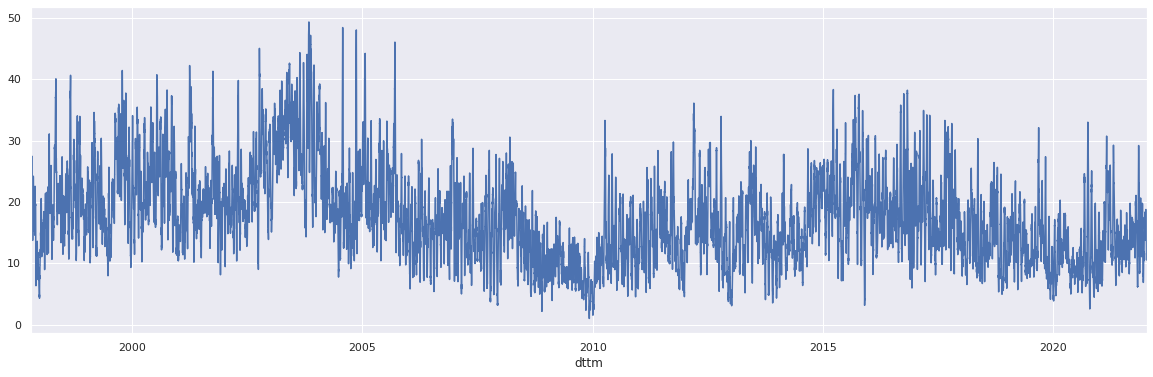

In [ ]:
sns.set()
ts.rolling(56).mean().plot(figsize=(20, 6))

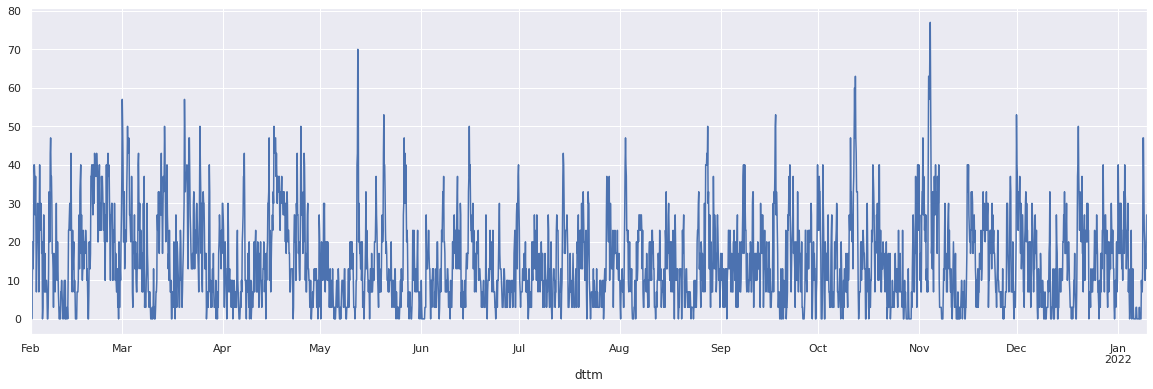

In [ ]:
ts.last('12m').plot(figsize=(20, 6))

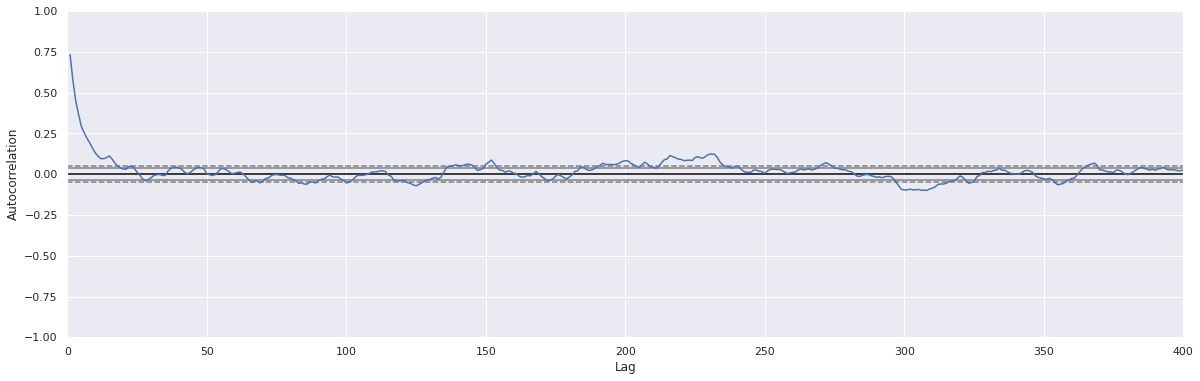

In [ ]:
plt.figure(figsize=(20, 6))
pd.plotting.autocorrelation_plot(ts.last('12m'),)

plt.xlim(0, 400)
plt.grid()

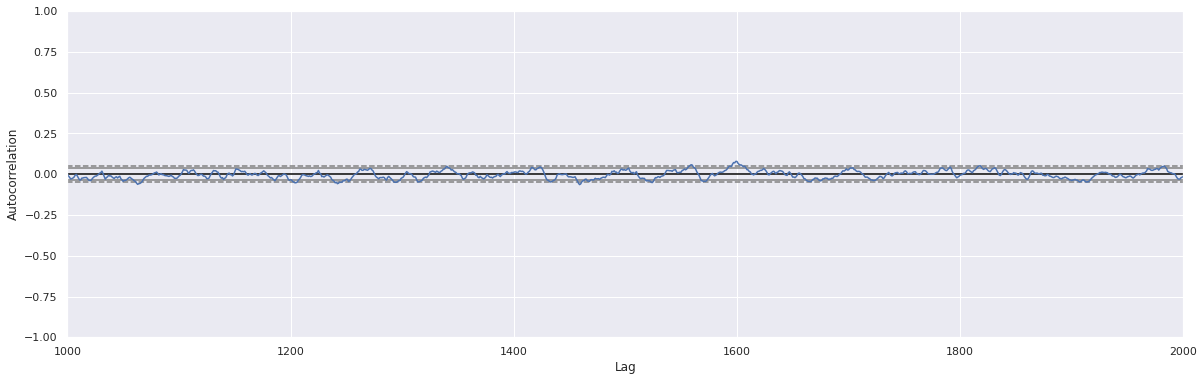

In [ ]:
plt.figure(figsize=(20, 6))
pd.plotting.autocorrelation_plot(ts.last('12m'),)

plt.xlim(1000, 2000)
plt.grid()

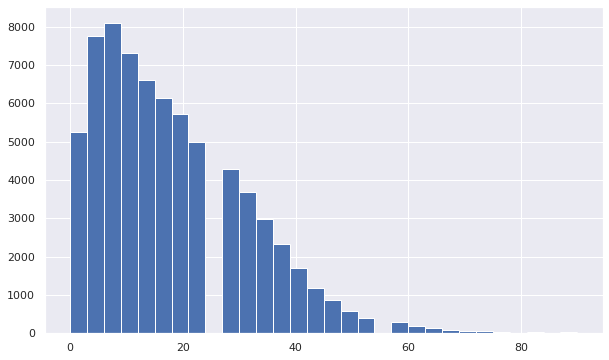

In [ ]:
df_3h['Kp*10'].hist(bins=30, figsize=(10, 6))

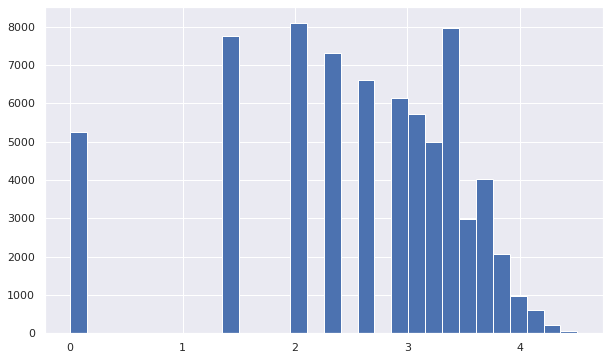

In [ ]:
df_3h['Kp*10'].apply(np.log1p).hist(bins=30, figsize=(10, 6))

In [ ]:
df_3h['Kp*10'].value_counts().sort_index()

# Жуткая несбалансированность

0     5237
3     7760
7     8101
10    7308
13    6597
17    6124
20    5725
23    4998
27    4275
30    3692
33    2990
37    2328
40    1698
43    1177
47     881
50     587
53     391
57     291
60     195
63     130
67      79
70      57
73      52
77      41
80      17
83      22
87      19
90       4
Name: Kp*10, dtype: int64

In [ ]:
# Входные признаки: геомагнитные индексы Kp, Dst (наземные наблюдения)
# компоненты межпланетного магнитного поля в точке Лагранжа L1 между Солнцем и Землёй Bx, By_GSM, Bz_GSM
# модуль межпланетного магнитного поля B_magn
# скорость солнечного ветра V_sw и его плотность Np в той же точке Лагранжа

In [ ]:
df.Dst.isnull().sum()

0

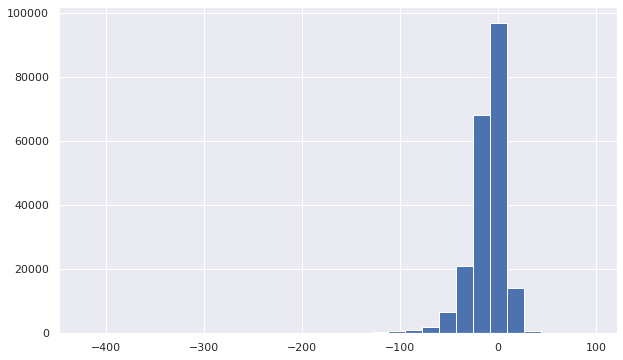

In [ ]:
df.Dst.hist(bins=30, figsize=(10, 6))

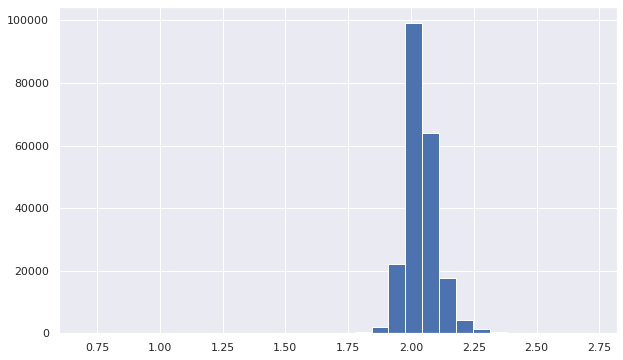

In [ ]:
df.Dst.apply(lambda x: np.log10(100 - x)).hist(bins=30, figsize=(10, 6))

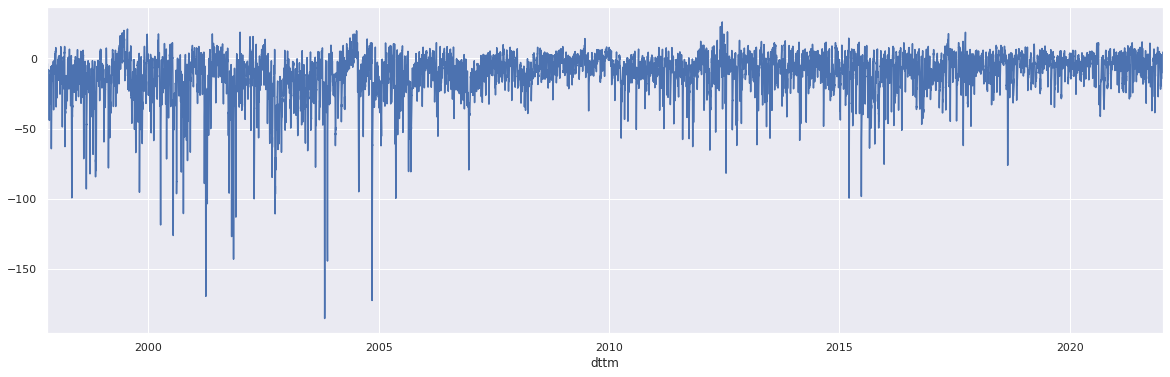

In [ ]:
ts_dst = df.set_index('dttm').Dst.asfreq('h')

ts_dst.rolling(56).mean().plot(figsize=(20, 6))

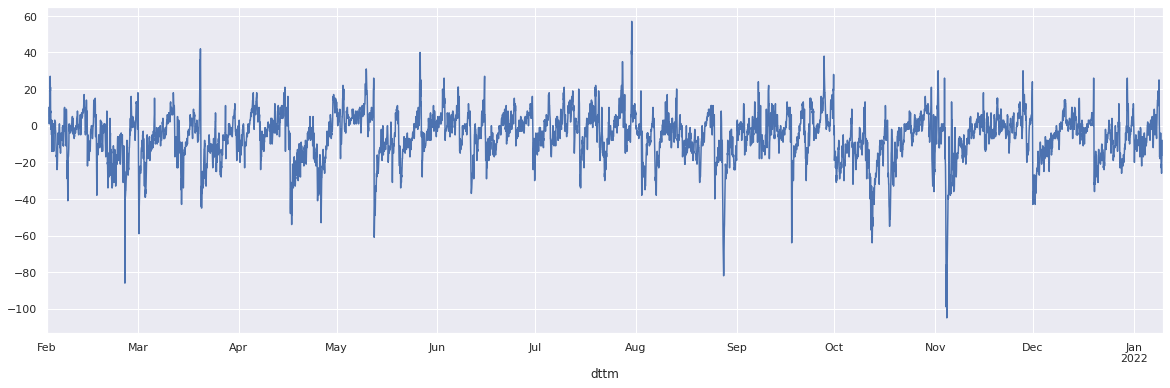

In [ ]:
ts_dst.last('12m').plot(figsize=(20, 6))

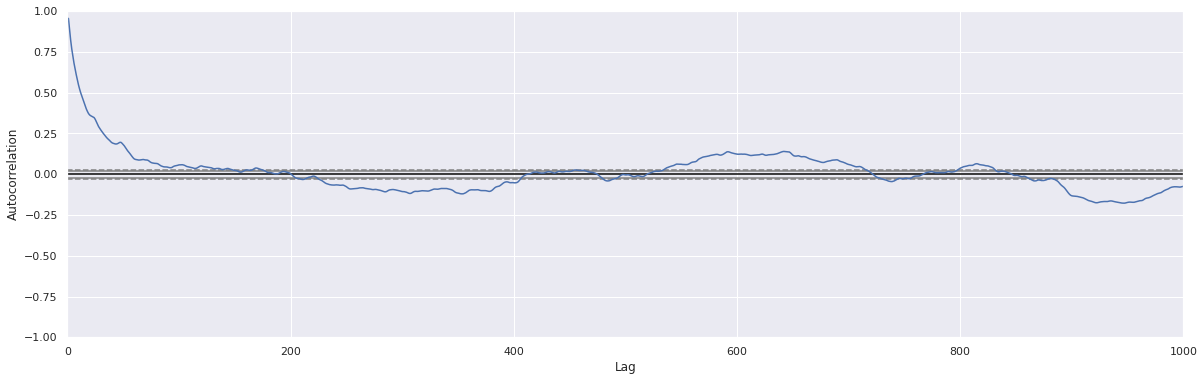

In [ ]:
plt.figure(figsize=(20, 6))
pd.plotting.autocorrelation_plot(ts_dst.last('12m'),)

plt.xlim(0, 1000)
plt.grid()

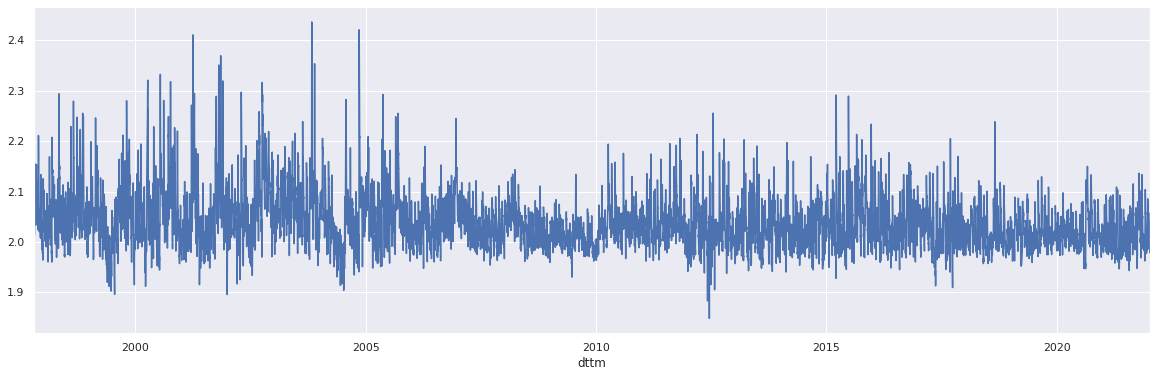

In [ ]:
ts_dst = df.set_index('dttm')['Lg_Dst'].asfreq('h')

ts_dst.rolling(56).mean().plot(figsize=(20, 6))

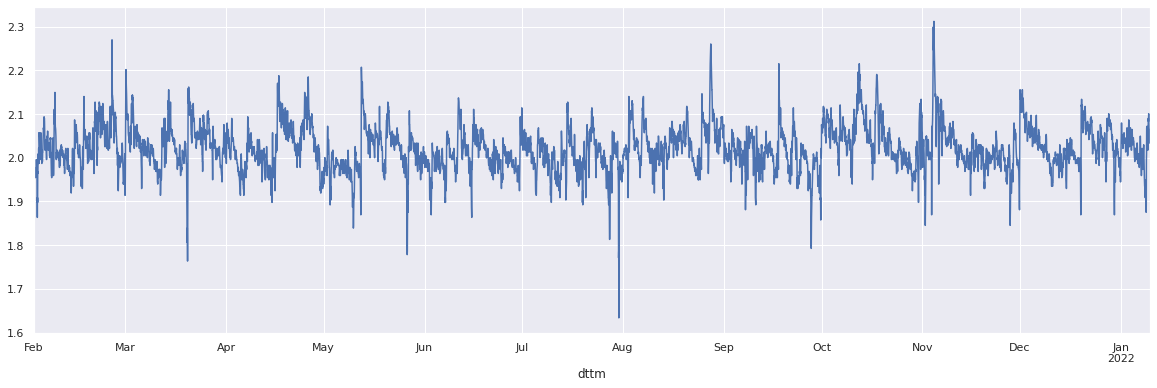

In [ ]:
ts_dst.last('12m').plot(figsize=(20, 6))

In [ ]:
df.B_x.isnull().sum() / df.shape[0]

In [ ]:
# Бимодальное распределение
# компоненты межпланетного магнитного поля в точке Лагранжа L1 между Солнцем и Землёй Bx, By_GSM, Bz_GSM

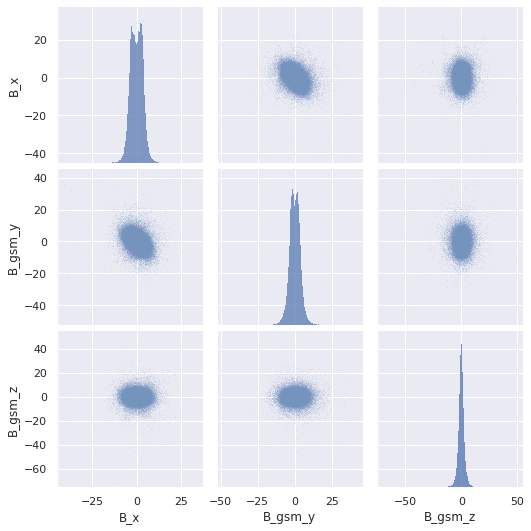

In [ ]:
sns.pairplot(df[geo_indices], plot_kws={'s': .1})

In [ ]:
ts_b = df.set_index('dttm')[geo_indices].asfreq('h')

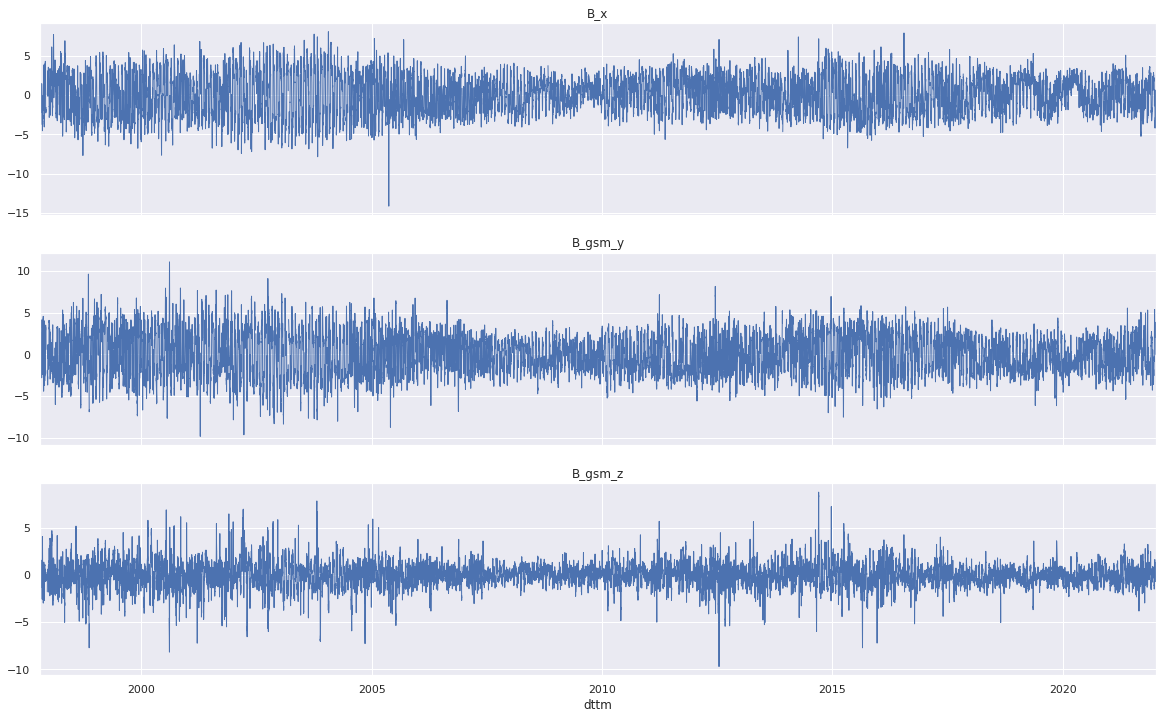

In [ ]:
f, ax = plt.subplots(3, 1, sharex=True)
series = ts_b.rolling(56 ).mean()
for i, index in enumerate(geo_indices):
    series[index].plot(figsize=(20, 6), lw=1, ax=ax[i])
    ax[i].set_title(index)
f.set_figheight(12)
f.set_figwidth(20)

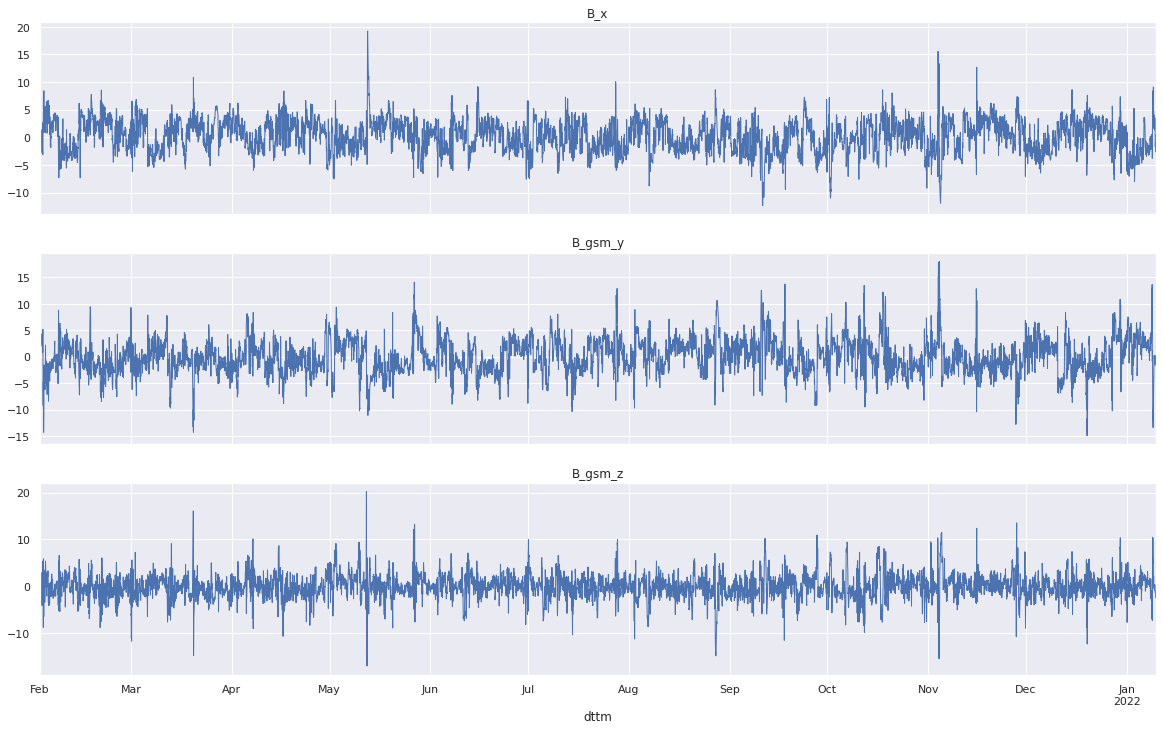

In [ ]:
f, ax = plt.subplots(3, 1, sharex=True)
series = ts_b.last('12m')
for i, index in enumerate(geo_indices):
    series[index].plot(figsize=(20, 6), lw=1, ax=ax[i])
    ax[i].set_title(index)
f.set_figheight(12)
f.set_figwidth(20)

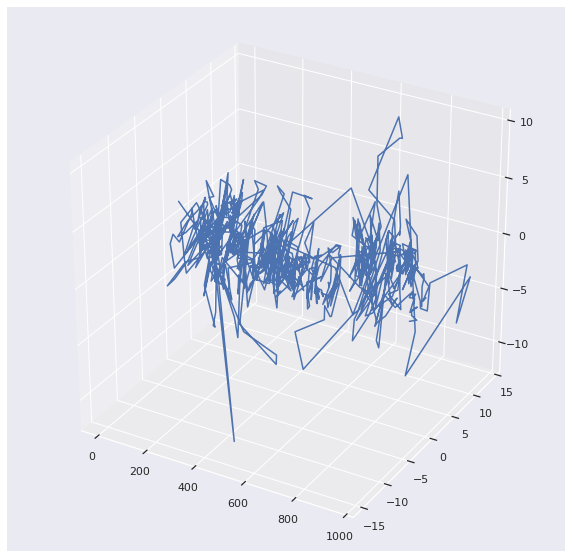

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
series = ts_b.last('2m')
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot(
    np.arange(len(series.index)), 
    series['B_gsm_y'], series['B_gsm_z'], )

In [ ]:
700 / 24

29.166666666666668

<Figure size 1440x432 with 0 Axes>

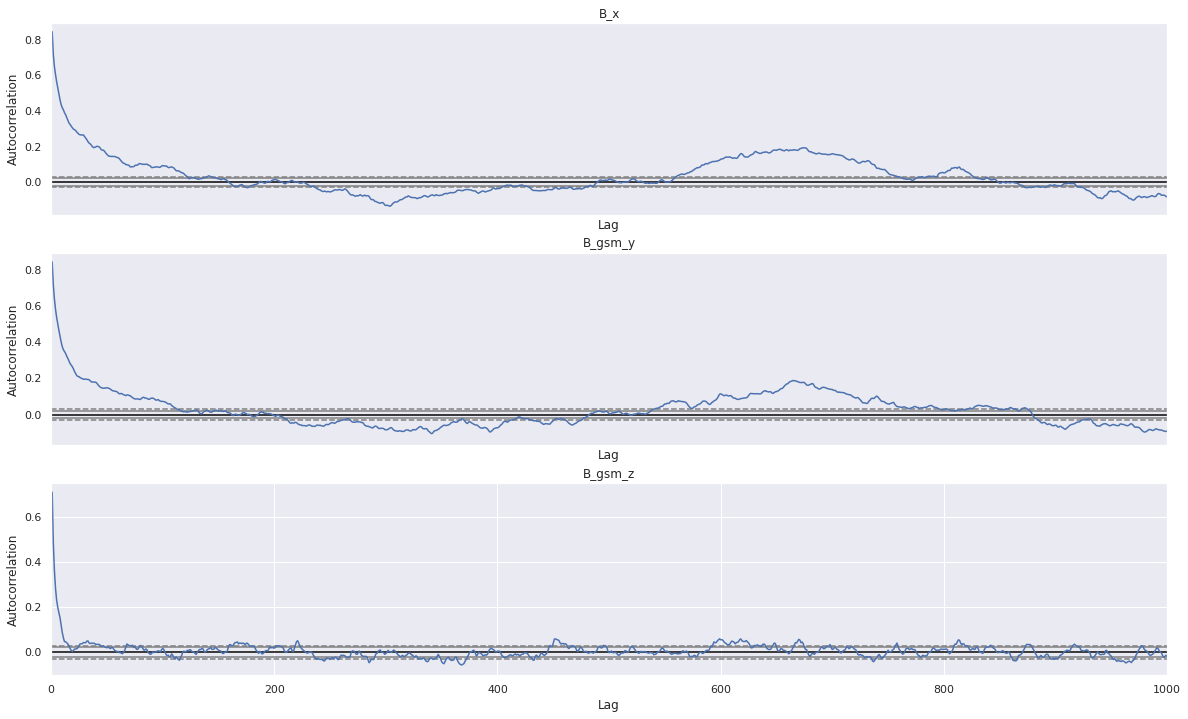

In [ ]:
# B_z апериодичен

plt.figure(figsize=(20, 6))
f, ax = plt.subplots(3, 1, sharex=True)
series = ts_b.last('12m')
for i, index in enumerate(geo_indices):
    pd.plotting.autocorrelation_plot(series[index], ax=ax[i])
    ax[i].set_title(index)
f.set_figheight(12)
f.set_figwidth(20)


plt.xlim(0, 1000)
plt.grid()

# Период автокорреляции приблизительно месяц

In [ ]:
df.B_magn.isnull().sum() / df.shape[0]

0.0016483930522587695

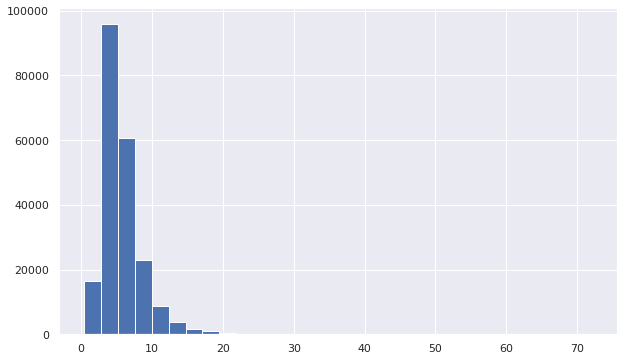

In [ ]:
df.B_magn.hist(bins=30, figsize=(10, 6))

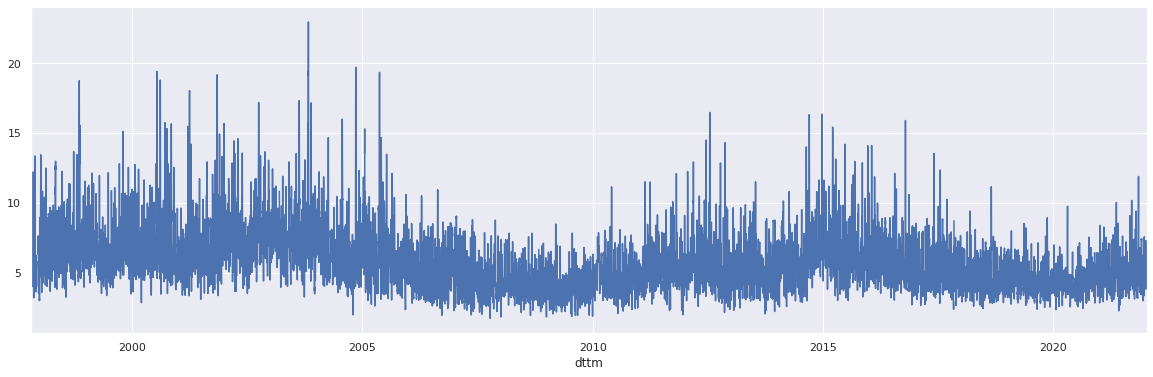

In [ ]:
ts_magn = df.set_index('dttm')['B_magn'].asfreq('h')

ts_magn.rolling(56).mean().plot(figsize=(20, 6))

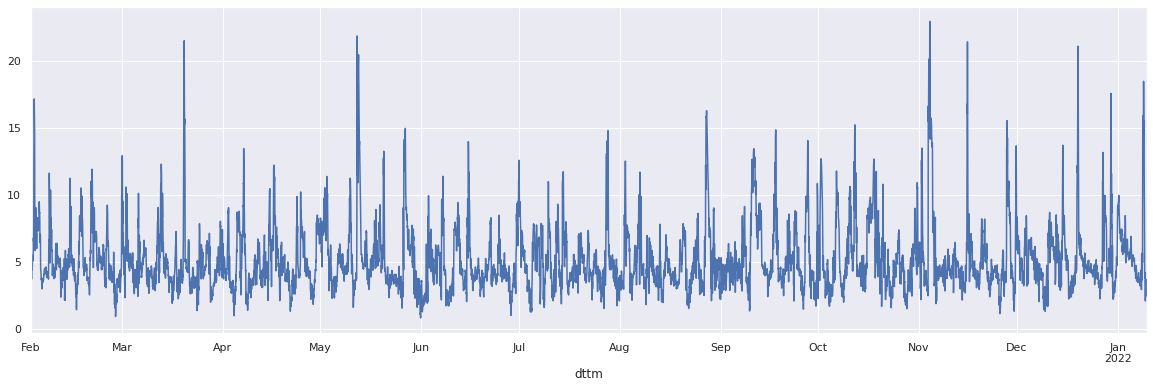

In [ ]:
ts_magn.last('12m').plot(figsize=(20, 6))

(0.0, 1000.0)

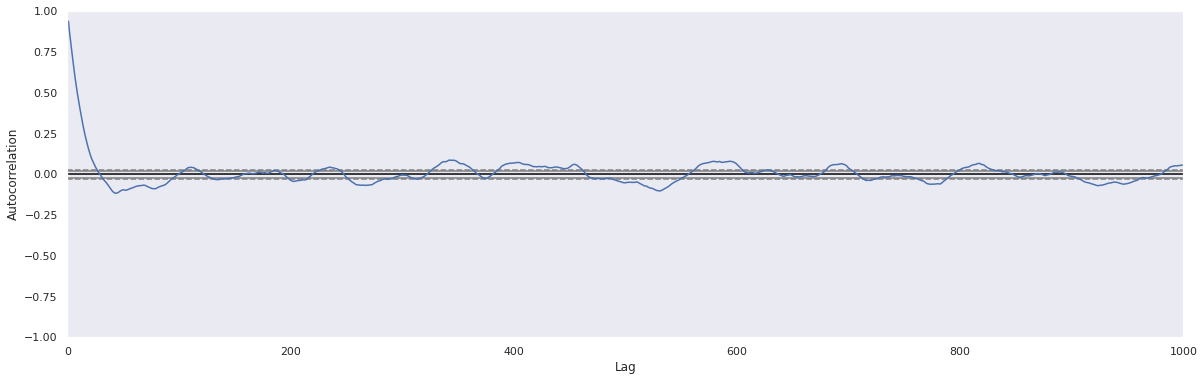

In [ ]:
plt.figure(figsize=(20, 6))

pd.plotting.autocorrelation_plot(ts_magn.last('12m'),)
plt.xlim(0, 1000)

# Слабая автокорреляция

In [ ]:
df['SW_spd'].isnull().sum()

3298

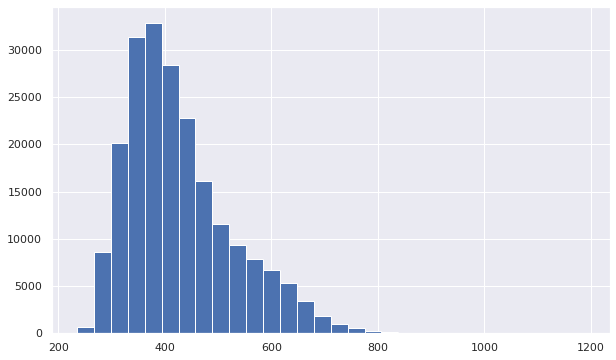

In [ ]:
df.SW_spd.hist(bins=30, figsize=(10, 6))

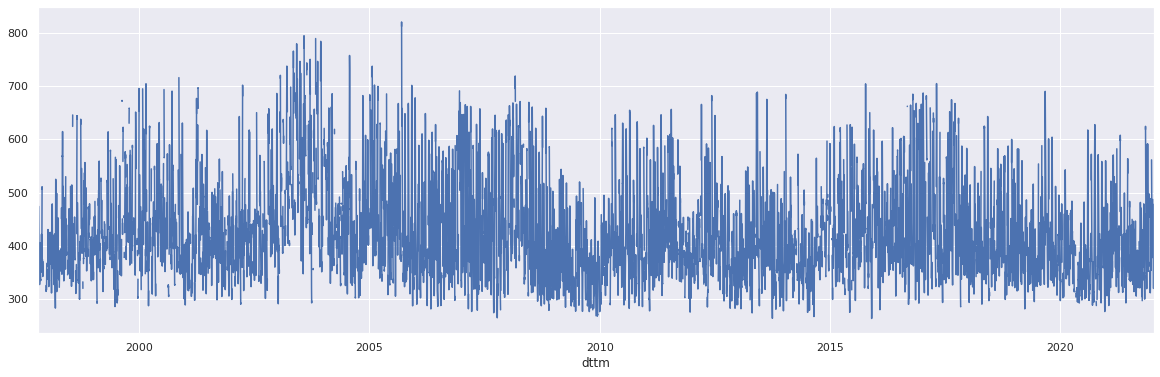

In [ ]:
ts_sw = df.set_index('dttm')['SW_spd'].asfreq('h')

ts_sw.rolling(56).mean().plot(figsize=(20, 6))

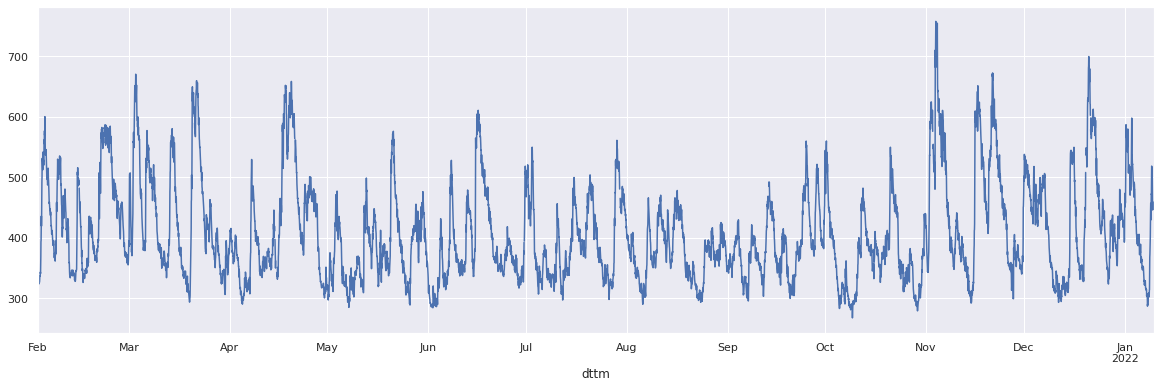

In [ ]:
ts_sw.last('12m').plot(figsize=(20, 6))

(0.0, 2000.0)

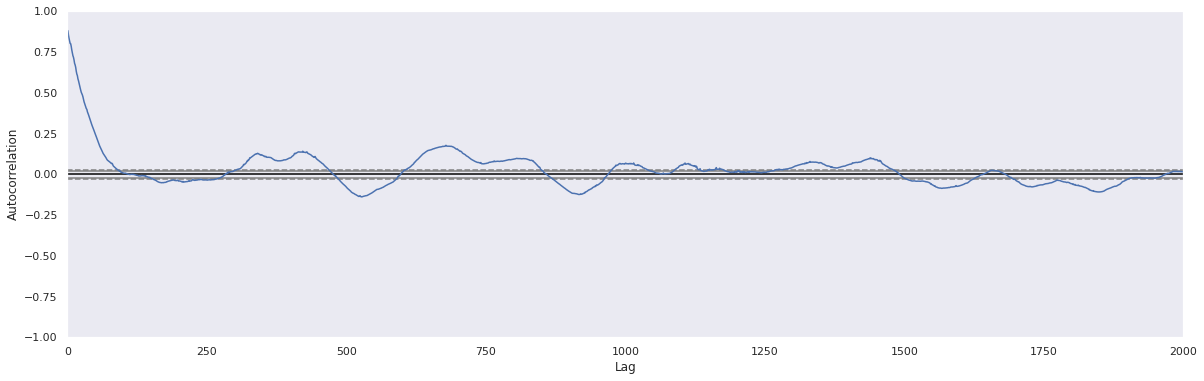

In [ ]:
plt.figure(figsize=(20, 6))

pd.plotting.autocorrelation_plot(ts_sw.last('12m').fillna(0),)
plt.xlim(0, 2000)

# Автокорреляция 15-20 дней

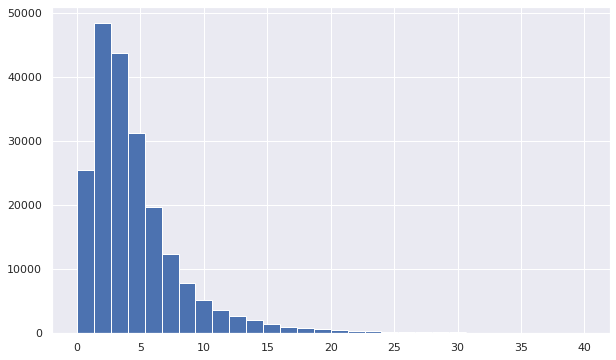

In [ ]:
df.H_den_SWP.hist(bins=30, figsize=(10, 6), range=(0, 40))

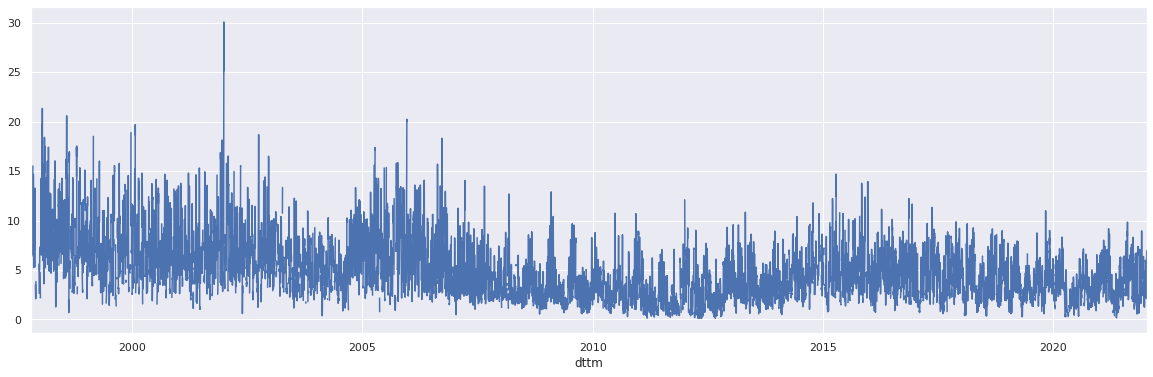

In [ ]:
ts_sw_d = df.set_index('dttm')['H_den_SWP'].asfreq('h')

ts_sw_d.rolling(56).mean().plot(figsize=(20, 6))

# Сдвиг примерно в 2005 году??

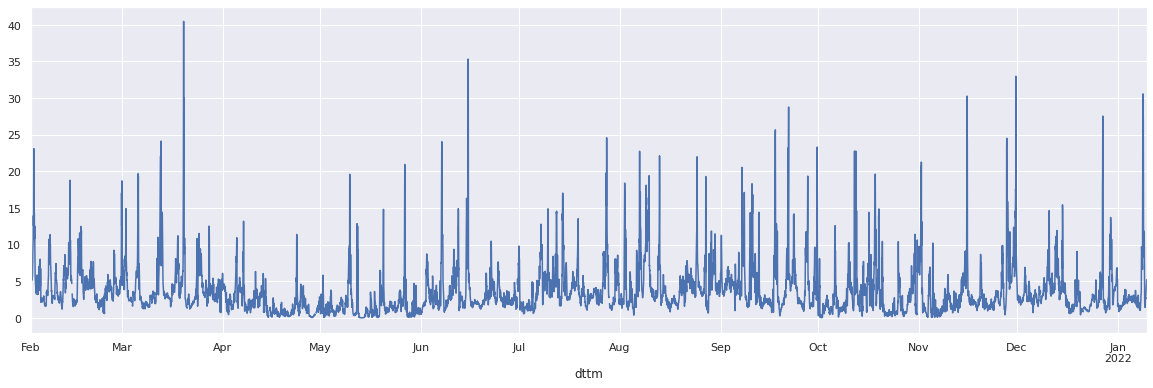

In [ ]:
# Обрезать, бокс-кокс

ts_sw_d.last('12m').plot(figsize=(20, 6))

(0.0, 2000.0)

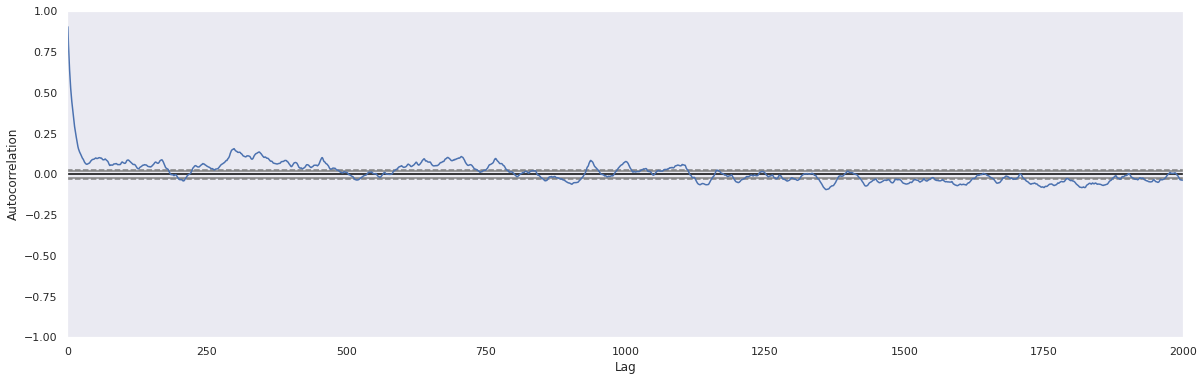

In [ ]:
plt.figure(figsize=(20, 6))

pd.plotting.autocorrelation_plot(ts_sw_d.last('12m').fillna(0),)
plt.xlim(0, 2000)

# Автокорреляция 15-20 дней

In [ ]:
all_variables = ['Kp*10', 'Dst', 'B_x', 'B_gsm_y', 'B_gsm_z', 'B_magn', 'SW_spd', 'H_den_SWP']

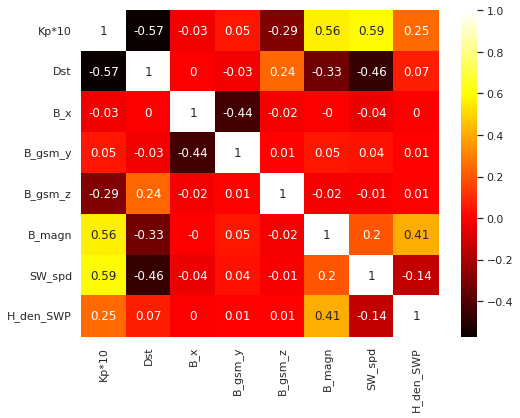

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[all_variables].corr().round(2), annot=True, cmap='hot')

In [ ]:
%%time

from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

tsne_pipe = make_pipeline(StandardScaler(), TSNE(random_state=17))

X = df.set_index('dttm').last('6m')[all_variables].reset_index(drop=True).fillna(0)

X_tsne = tsne_pipe.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 57.4 s, sys: 232 ms, total: 57.6 s
Wall time: 30 s


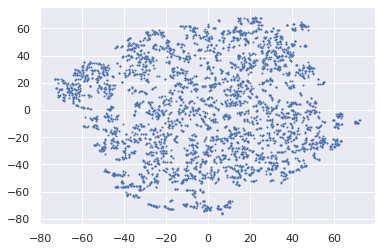

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=1)

In [25]:
(
    df.isnull().sum().iloc[9: -1].rename('null_count').to_frame()
      .join(
          df.isnull().mean().iloc[9: -1].rename('null_ratio')
      )).to_excel('features.xlsx')